In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

from utils.paths import ROOT, DATA_DIR, RAW_DIR, PROCESSED_DIR, EQUITY_DIR

# Data Acquisition and Processing

In [2]:
eq_pth = os.path.join(EQUITY_DIR, "1d", "AAPL.csv")
eq_df = pd.read_csv(eq_pth, skiprows=2)
eq_df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
eq_df.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
1,2015-01-05,23.577574,24.110150,23.391173,24.030263,257142000
2,2015-01-06,23.579794,23.839424,23.218085,23.641928,263188400
3,2015-01-07,23.910433,24.010290,23.677430,23.788384,160423600
4,2015-01-08,24.829119,24.886815,24.121236,24.238848,237458000


In [3]:
eq_df["Date"] = pd.to_datetime(eq_df["Date"])
# Covert from Date feature as index of dataframe
eq_df.set_index("Date", inplace=True)
eq_df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2015-01-02,24.261047,24.729270,23.821672,24.718174,212818400
2015-01-05,23.577574,24.110150,23.391173,24.030263,257142000
2015-01-06,23.579794,23.839424,23.218085,23.641928,263188400
2015-01-07,23.910433,24.010290,23.677430,23.788384,160423600
2015-01-08,24.829119,24.886815,24.121236,24.238848,237458000


<Axes: xlabel='Date'>

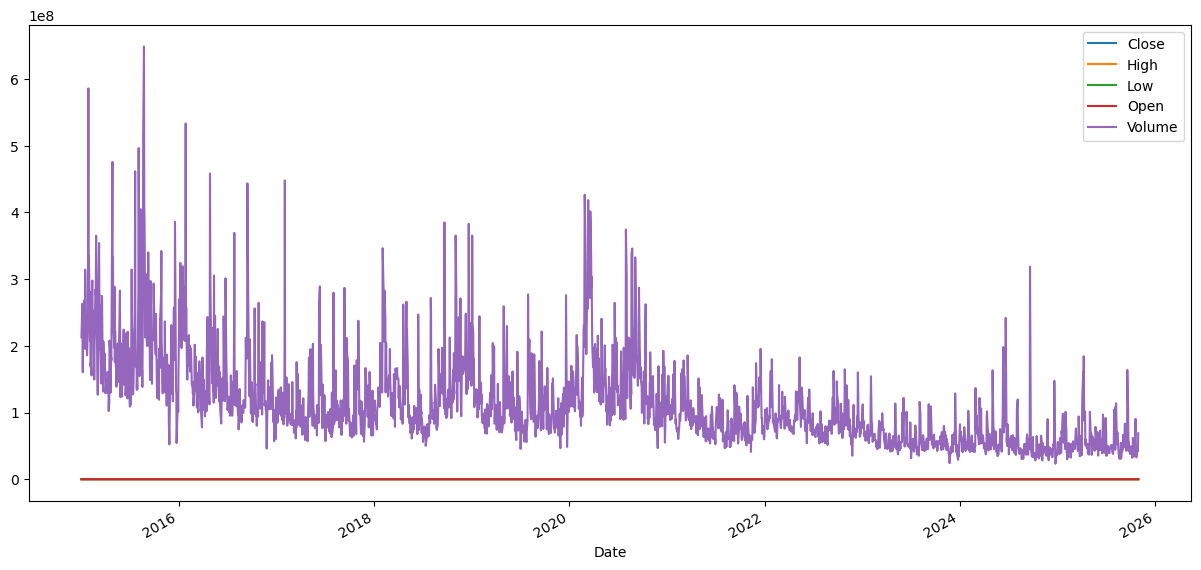

In [4]:
# Plot size
# |_figsize=(10, 5): Default
# |_ figsize=(15, 7): Recomeded for Time Series
# |_ figsize=(20, 8): Large Scale
eq_df.plot(figsize=(15, 7))

In [5]:
# tf means time frame or time range
tf_mask = (eq_df.index >= dt.datetime(2020, 1, 1)) & (eq_df.index <= dt.datetime(2024, 12, 31))
eqmh_df = eq_df.iloc[tf_mask]
eqmh_df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-01-02,72.538536,72.598914,71.292326,71.545912,135480400
2020-01-03,71.833290,72.594055,71.608685,71.765667,146322800
2020-01-06,72.405701,72.444344,70.703034,70.954210,118387200
2020-01-07,72.065147,72.671341,71.845369,72.415337,108872000
2020-01-08,73.224419,73.526310,71.768094,71.768094,132079200


In [6]:
eqmh_df.tail()

,Close,High,Low,Open,Volume
Date,,,,,
2024-12-24,257.286682,257.296626,254.386957,254.586262,23234700
2024-12-26,258.103729,259.179926,256.718662,257.276679,27237100
2024-12-27,254.685867,257.784882,252.164818,256.917934,42355300
2024-12-30,251.307877,252.603281,249.863009,251.337769,35557500
2024-12-31,249.534180,252.384064,248.547676,251.547039,39480700


# 1. Time Bars

$
\large r_t = \ln\left(\frac{P_{\text{Close},t}}{P_{\text{Close},t-1}}\right)
$

In [7]:
time_bars_price = eqmh_df.copy()
time_bars = np.log(time_bars_price["Close"] / time_bars_price["Close"].shift(1)).dropna()
time_bars

Date
2020-01-03   -0.009770
2020-01-06    0.007937
2020-01-07   -0.004715
2020-01-08    0.015958
2020-01-09    0.021018
                ...   
2024-12-24    0.011413
2024-12-26    0.003171
2024-12-27   -0.013331
2024-12-30   -0.013352
2024-12-31   -0.007083
Name: Close, Length: 1257, dtype: float64

Bin Length - Size of log returns as percentage %
* $ \text{Big Lenth} = \huge\frac{\text{size of log return}}{100}$
* bl = bin length
* rs = Size of log returns such as returns = 0.001, 0.008, 0.0018

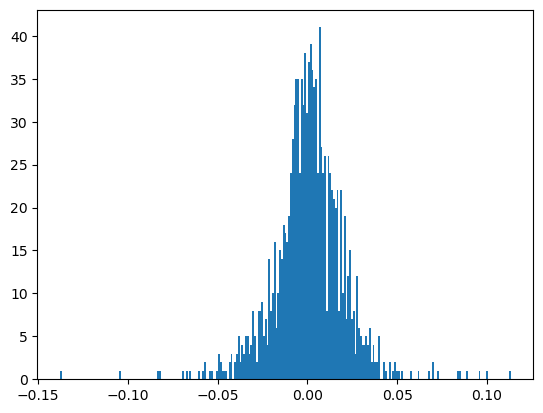

In [8]:
bin_len = 0.001 # means size = 0.1%
plt.hist(time_bars, bins=np.arange(min(time_bars), max(time_bars) + bin_len, bin_len))
plt.show()

Distribution return prices between Fat Tails and Bell distributions
* x-axis = returns
* y-axis = frequency

# 2. Tick Bars

In [10]:
stocks_eq_pth = os.path.join(PROCESSED_DIR, "tech_stocks_us_equity_1d.csv")
stocks_eq_df = pd.read_csv(stocks_eq_pth)
# stocks_eq_df.columns = ["Date", "Close", "High", "Low", "Open", "Volume"]
stocks_eq_df.head()

/tmp/ipykernel_107485/2928653373.py:2: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,26

,Price,Price.1,Price.2,Close,Close.1,Close.2,Close.3,Close.4,Close.5,Close.6,...,Volume.72,Volume.73,Volume.74,Volume.75,Volume.76,Volume.77,Volume.78,Volume.79,Volume.80,Volume.81
0,Ticker,ANSS,JNPR,AAPL,ACN,ADBE,ADI,ADP,ADSK,AKAM,...,TDY,TEL,TER,TRMB,TXN,TYL,UBER,VRSN,WDC,ZBRA
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-02,NaN,NaN,24.26104164123535,74.25262451171875,72.33999633789062,44.51115036010742,65.98639678955078,59.529998779296875,63.25,...,145700,948900,1030300,1106000,4020100,216200,NaN,684500,1278547,411800
3,2015-01-05,NaN,NaN,23.57756996154785,72.99890899658203,71.9800033569336,43.70171356201172,65.93885803222656,58.65999984741211,61.939998626708984,...,266200,953400,1877000,1254900,5599300,270300,NaN,874400,2199752,420300
4,2015-01-06,NaN,NaN,23.57979393005371,72.47238159179688,70.52999877929688,42.67587661743164,65.3922348022461,57.5,60.66999816894531,...,243000,1448800,2377700,2291600,5468400,239600,NaN,1289300,2665713,527500


In [11]:
stocks_eq_df.columns

Index(['Price', 'Price.1', 'Price.2', 'Close', 'Close.1', 'Close.2', 'Close.3',
       'Close.4', 'Close.5', 'Close.6',
       ...
       'Volume.72', 'Volume.73', 'Volume.74', 'Volume.75', 'Volume.76',
       'Volume.77', 'Volume.78', 'Volume.79', 'Volume.80', 'Volume.81'],
      dtype='object', length=413)

In [12]:
features = ["Close", "Volume"]

Step 1: Parsing column names...
Parsed columns (sample): [('Price', '0'), ('Price', '1'), ('Price', '2'), ('Close', '70'), ('Close', '71'), ('Close', '72')]


In [14]:
print("\nStep 2: Applying MultiIndex...")

# 1. สร้าง MultiIndex จาก List ที่เราเพิ่งแยกส่วน
new_index = pd.MultiIndex.from_tuples(parsed_columns, names=['Feature', 'Ticker_ID'])

# 2. อัปเดต DataFrame ของคุณ
stocks_eq_df.columns = new_index

print("\nSUCCESS! Your DataFrame now has clean MultiIndex columns:")
stocks_eq_df.head()


Step 2: Applying MultiIndex...

SUCCESS! Your DataFrame now has clean MultiIndex columns:


Feature         Price                          Close                     \
Ticker_ID           0     1     2                  0                  1   
0              Ticker  ANSS  JNPR               AAPL                ACN   
1                Date   NaN   NaN                NaN                NaN   
2          2015-01-02   NaN   NaN  24.26104164123535  74.25262451171875   
3          2015-01-05   NaN   NaN  23.57756996154785  72.99890899658203   
4          2015-01-06   NaN   NaN  23.57979393005371  72.47238159179688   

Feature                                                             \
Ticker_ID                  2                  3                  4   
0                       ADBE                ADI                ADP   
1                        NaN                NaN                NaN   
2          72.33999633789062  44.51115036010742  65.98639678955078   
3           71.9800033569336  43.70171356201172  65.93885803222656   
4          70.52999877929688  42.67587661743164   65.3922348022461   

Feature                                            ...  Volume           \
Ticker_ID                   5                   6  ...      72       73   
0                        ADSK                AKAM  ...     TDY      TEL   
1                         NaN                 NaN  ...     NaN      NaN   
2          59.529998779296875               63.25  ...  145700   948900   
3           58.65999984741211  61.939998626708984  ...  266200   953400   
4                        57.5   60.66999816894531  ...  243000  1448800   

Feature                                                                       
Ticker_ID       74       75       76      77    78       79       80      81  
0              TER     TRMB      TXN     TYL  UBER     VRSN      WDC    ZBRA  
1              NaN      NaN      NaN     NaN   NaN      NaN      NaN     NaN  
2          1030300  1106000  4020100  216200   NaN   684500  1278547  411800  
3          1877000  1254900  5599300  270300   NaN   874400  2199752  420300  
4          2377700  2291600  5468400  239600   NaN  1289300  2665713  527500  

[5 rows x 413 columns]

In [57]:
current_levels = stocks_eq_df.columns.levels
current_levels[1]

Index(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19',
       '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3',
       '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40',
       '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51',
       '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62',
       '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73',
       '74', '75', '76', '77', '78', '79', '8', '80', '81', '9'],
      dtype='object', name='Ticker_ID')

In [58]:
ticker_names = stocks_eq_df.iloc[0].values
ticker_names

array(['Ticker', 'ANSS', 'JNPR', 'AAPL', 'ACN', 'ADBE', 'ADI', 'ADP',
       'ADSK', 'AKAM', 'AMAT', 'AMD', 'ANET', 'ANSS', 'APH', 'AVGO', 'BR',
       'CDNS', 'CDW', 'CPAY', 'CRM', 'CRWD', 'CSCO', 'CTSH', 'DAY',
       'DELL', 'ENPH', 'EPAM', 'FFIV', 'FI', 'FICO', 'FIS', 'FSLR',
       'FTNT', 'FTV', 'GDDY', 'GEN', 'GLW', 'GRMN', 'HPE', 'HPQ', 'IBM',
       'INTC', 'INTU', 'IT', 'JBL', 'JKHY', 'JNPR', 'KEYS', 'KLAC',
       'LDOS', 'LRCX', 'MCHP', 'MPWR', 'MSFT', 'MSI', 'MU', 'NOW', 'NTAP',
       'NVDA', 'NXPI', 'ON', 'ORCL', 'PANW', 'PAYC', 'PAYX', 'PLTR',
       'PTC', 'QCOM', 'QRVO', 'ROP', 'SMCI', 'SNPS', 'STX', 'SWKS', 'TDY',
       'TEL', 'TER', 'TRMB', 'TXN', 'TYL', 'UBER', 'VRSN', 'WDC', 'ZBRA',
       'AAPL', 'ACN', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'AMAT', 'AMD',
       'ANET', 'ANSS', 'APH', 'AVGO', 'BR', 'CDNS', 'CDW', 'CPAY', 'CRM',
       'CRWD', 'CSCO', 'CTSH', 'DAY', 'DELL', 'ENPH', 'EPAM', 'FFIV',
       'FI', 'FICO', 'FIS', 'FSLR', 'FTNT', 'FTV', 'GDDY', 'GEN', 

In [59]:
len(ticker_names)

413

In [60]:
len(stocks_eq_df.columns.levels[1])

82

In [61]:
ticker_names = np.delete(ticker_names, 0)
unique_ticker_names = list(set(ticker_names))
len(unique_ticker_names)

82

In [67]:
new_levels = list(current_levels)
new_levels[1] = unique_ticker_names

In [66]:
stocks_eq_df.columns = pd.MultiIndex.from_product(new_levels, names=stocks_eq_df.columns.names)
stocks_eq_df.head()

ValueError: Length mismatch: Expected axis has 413 elements, new values have 492 elements